# **X^2**

Ciclo: 1 | Erro total: 0.6661
Ciclo: 2 | Erro total: 0.2653
Ciclo: 3 | Erro total: 0.5935
Ciclo: 4 | Erro total: 0.3106
Ciclo: 5 | Erro total: 0.2204
Ciclo: 6 | Erro total: 0.1714
Ciclo: 7 | Erro total: 0.1397
Ciclo: 8 | Erro total: 0.1180
Ciclo: 9 | Erro total: 0.1028
Ciclo: 10 | Erro total: 0.0922
Ciclo: 11 | Erro total: 0.0847
Ciclo: 12 | Erro total: 0.0796
Ciclo: 13 | Erro total: 0.0761
Ciclo: 14 | Erro total: 0.0737
Ciclo: 15 | Erro total: 0.0721
Ciclo: 16 | Erro total: 0.0709
Ciclo: 17 | Erro total: 0.0702
Ciclo: 18 | Erro total: 0.0696
Ciclo: 19 | Erro total: 0.0692
Ciclo: 20 | Erro total: 0.0689
Ciclo: 21 | Erro total: 0.0687
Ciclo: 22 | Erro total: 0.0685
Ciclo: 23 | Erro total: 0.0684
Ciclo: 24 | Erro total: 0.0682
Ciclo: 25 | Erro total: 0.0681
Ciclo: 26 | Erro total: 0.0681
Ciclo: 27 | Erro total: 0.0680
Ciclo: 28 | Erro total: 0.0679
Ciclo: 29 | Erro total: 0.0679
Ciclo: 30 | Erro total: 0.0678
Ciclo: 31 | Erro total: 0.0677
Ciclo: 32 | Erro total: 0.0676
Ciclo: 33 | Erro 

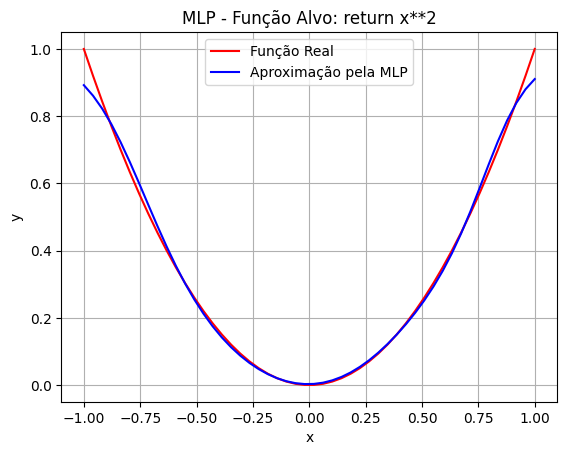

In [1]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**2

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


# **Função Polinomial - X^3 - 2*X + 1**

Ciclo: 1 | Erro total: 15.8354
Ciclo: 2 | Erro total: 9.8141
Ciclo: 3 | Erro total: 9.5615
Ciclo: 4 | Erro total: 9.4140
Ciclo: 5 | Erro total: 9.2956
Ciclo: 6 | Erro total: 9.1979
Ciclo: 7 | Erro total: 9.1177
Ciclo: 8 | Erro total: 9.0521
Ciclo: 9 | Erro total: 8.9983
Ciclo: 10 | Erro total: 8.9538
Ciclo: 11 | Erro total: 8.9168
Ciclo: 12 | Erro total: 8.8855
Ciclo: 13 | Erro total: 8.8587
Ciclo: 14 | Erro total: 8.8356
Ciclo: 15 | Erro total: 8.8154
Ciclo: 16 | Erro total: 8.7977
Ciclo: 17 | Erro total: 8.7819
Ciclo: 18 | Erro total: 8.7678
Ciclo: 19 | Erro total: 8.7551
Ciclo: 20 | Erro total: 8.7437
Ciclo: 21 | Erro total: 8.7332
Ciclo: 22 | Erro total: 8.7237
Ciclo: 23 | Erro total: 8.7150
Ciclo: 24 | Erro total: 8.7070
Ciclo: 25 | Erro total: 8.6996
Ciclo: 26 | Erro total: 8.6928
Ciclo: 27 | Erro total: 8.6865
Ciclo: 28 | Erro total: 8.6806
Ciclo: 29 | Erro total: 8.6751
Ciclo: 30 | Erro total: 8.6699
Ciclo: 31 | Erro total: 8.6651
Ciclo: 32 | Erro total: 8.6607
Ciclo: 33 | Erro

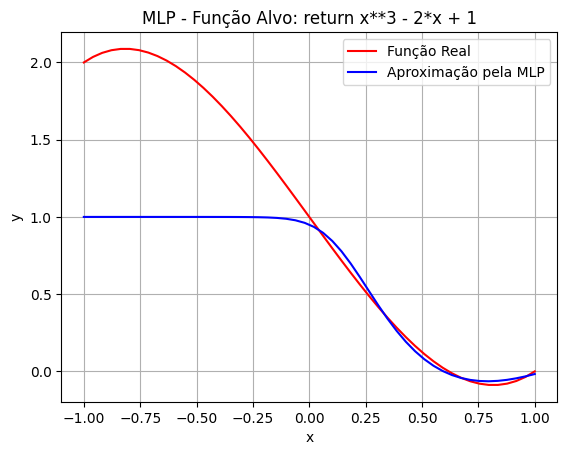

In [2]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**3 - 2*x + 1

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


## **Função trigonométrica - sen(x)**

Ciclo: 1 | Erro total: 0.6538
Ciclo: 2 | Erro total: 0.0833
Ciclo: 3 | Erro total: 0.0063
Ciclo: 4 | Erro total: 0.0017
Ciclo: 5 | Erro total: 0.0018
Ciclo: 6 | Erro total: 0.0021
Ciclo: 7 | Erro total: 0.0025
Ciclo: 8 | Erro total: 0.0029
Ciclo: 9 | Erro total: 0.0033
Ciclo: 10 | Erro total: 0.0036
Ciclo: 11 | Erro total: 0.0039
Ciclo: 12 | Erro total: 0.0041
Ciclo: 13 | Erro total: 0.0042
Ciclo: 14 | Erro total: 0.0043
Ciclo: 15 | Erro total: 0.0043
Ciclo: 16 | Erro total: 0.0043
Ciclo: 17 | Erro total: 0.0042
Ciclo: 18 | Erro total: 0.0041
Ciclo: 19 | Erro total: 0.0040
Ciclo: 20 | Erro total: 0.0038
Ciclo: 21 | Erro total: 0.0037
Ciclo: 22 | Erro total: 0.0035
Ciclo: 23 | Erro total: 0.0033
Ciclo: 24 | Erro total: 0.0032
Ciclo: 25 | Erro total: 0.0030
Ciclo: 26 | Erro total: 0.0028
Ciclo: 27 | Erro total: 0.0026
Ciclo: 28 | Erro total: 0.0025
Ciclo: 29 | Erro total: 0.0023
Ciclo: 30 | Erro total: 0.0022
Ciclo: 31 | Erro total: 0.0020
Ciclo: 32 | Erro total: 0.0019
Ciclo: 33 | Erro 

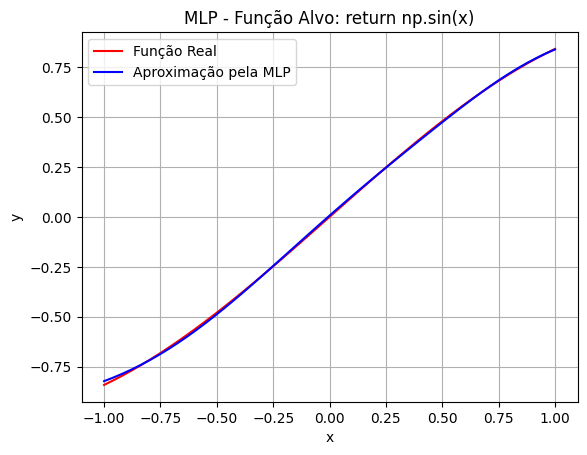

In [3]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
     return np.sin(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Exponencial - exp(x)**

Ciclo: 1 | Erro total: 11.0828
Ciclo: 2 | Erro total: 10.4112
Ciclo: 3 | Erro total: 10.4089
Ciclo: 4 | Erro total: 10.3193
Ciclo: 5 | Erro total: 10.2341
Ciclo: 6 | Erro total: 10.1825
Ciclo: 7 | Erro total: 10.1517
Ciclo: 8 | Erro total: 10.1319
Ciclo: 9 | Erro total: 10.1183
Ciclo: 10 | Erro total: 10.1085
Ciclo: 11 | Erro total: 10.1010
Ciclo: 12 | Erro total: 10.0951
Ciclo: 13 | Erro total: 10.0904
Ciclo: 14 | Erro total: 10.0866
Ciclo: 15 | Erro total: 10.0835
Ciclo: 16 | Erro total: 10.0809
Ciclo: 17 | Erro total: 10.0787
Ciclo: 18 | Erro total: 10.0768
Ciclo: 19 | Erro total: 10.0752
Ciclo: 20 | Erro total: 10.0738
Ciclo: 21 | Erro total: 10.0726
Ciclo: 22 | Erro total: 10.0716
Ciclo: 23 | Erro total: 10.0707
Ciclo: 24 | Erro total: 10.0698
Ciclo: 25 | Erro total: 10.0691
Ciclo: 26 | Erro total: 10.0685
Ciclo: 27 | Erro total: 10.0679
Ciclo: 28 | Erro total: 10.0674
Ciclo: 29 | Erro total: 10.0669
Ciclo: 30 | Erro total: 10.0664
Ciclo: 31 | Erro total: 10.0660
Ciclo: 32 | Erro 

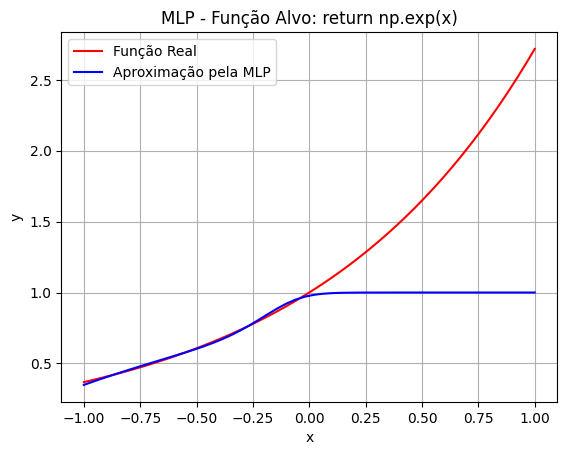

In [4]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.exp(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Logaritmica - log(x+2)**

Ciclo: 1 | Erro total: 0.5278
Ciclo: 2 | Erro total: 0.1490
Ciclo: 3 | Erro total: 0.1047
Ciclo: 4 | Erro total: 0.0669
Ciclo: 5 | Erro total: 0.0420
Ciclo: 6 | Erro total: 0.0317
Ciclo: 7 | Erro total: 0.0298
Ciclo: 8 | Erro total: 0.0319
Ciclo: 9 | Erro total: 0.0357
Ciclo: 10 | Erro total: 0.0397
Ciclo: 11 | Erro total: 0.0432
Ciclo: 12 | Erro total: 0.0460
Ciclo: 13 | Erro total: 0.0480
Ciclo: 14 | Erro total: 0.0494
Ciclo: 15 | Erro total: 0.0502
Ciclo: 16 | Erro total: 0.0505
Ciclo: 17 | Erro total: 0.0503
Ciclo: 18 | Erro total: 0.0498
Ciclo: 19 | Erro total: 0.0491
Ciclo: 20 | Erro total: 0.0481
Ciclo: 21 | Erro total: 0.0469
Ciclo: 22 | Erro total: 0.0456
Ciclo: 23 | Erro total: 0.0443
Ciclo: 24 | Erro total: 0.0428
Ciclo: 25 | Erro total: 0.0414
Ciclo: 26 | Erro total: 0.0400
Ciclo: 27 | Erro total: 0.0386
Ciclo: 28 | Erro total: 0.0372
Ciclo: 29 | Erro total: 0.0359
Ciclo: 30 | Erro total: 0.0347
Ciclo: 31 | Erro total: 0.0335
Ciclo: 32 | Erro total: 0.0324
Ciclo: 33 | Erro 

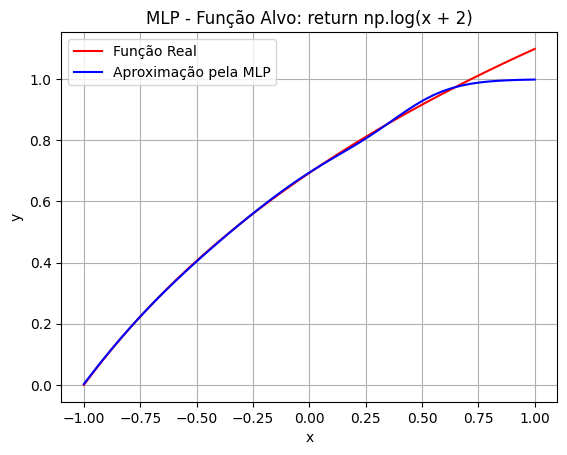

In [5]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.log(x + 2) 

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

# **Função Modular - |x|**

Ciclo: 1 | Erro total: 2.9761
Ciclo: 2 | Erro total: 0.6940
Ciclo: 3 | Erro total: 0.8867
Ciclo: 4 | Erro total: 0.6187
Ciclo: 5 | Erro total: 0.4458
Ciclo: 6 | Erro total: 0.3388
Ciclo: 7 | Erro total: 0.2636
Ciclo: 8 | Erro total: 0.2082
Ciclo: 9 | Erro total: 0.1664
Ciclo: 10 | Erro total: 0.1346
Ciclo: 11 | Erro total: 0.1103
Ciclo: 12 | Erro total: 0.0918
Ciclo: 13 | Erro total: 0.0778
Ciclo: 14 | Erro total: 0.0673
Ciclo: 15 | Erro total: 0.0595
Ciclo: 16 | Erro total: 0.0537
Ciclo: 17 | Erro total: 0.0496
Ciclo: 18 | Erro total: 0.0466
Ciclo: 19 | Erro total: 0.0445
Ciclo: 20 | Erro total: 0.0430
Ciclo: 21 | Erro total: 0.0420
Ciclo: 22 | Erro total: 0.0412
Ciclo: 23 | Erro total: 0.0407
Ciclo: 24 | Erro total: 0.0404
Ciclo: 25 | Erro total: 0.0401
Ciclo: 26 | Erro total: 0.0398
Ciclo: 27 | Erro total: 0.0396
Ciclo: 28 | Erro total: 0.0393
Ciclo: 29 | Erro total: 0.0391
Ciclo: 30 | Erro total: 0.0389
Ciclo: 31 | Erro total: 0.0386
Ciclo: 32 | Erro total: 0.0384
Ciclo: 33 | Erro 

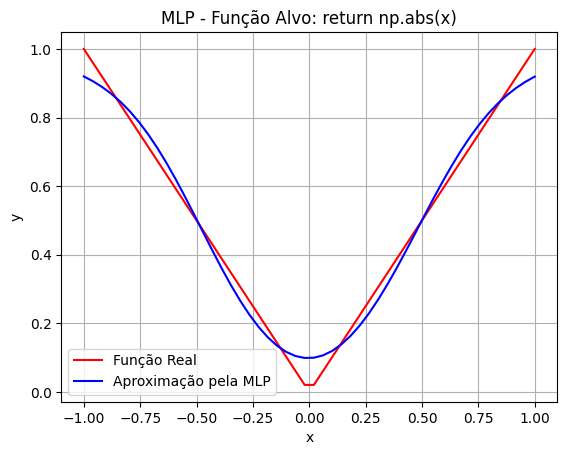

In [6]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return np.abs(x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **x^2 * np.sin(1/x)**

Ciclo: 1 | Erro total: 0.7161
Ciclo: 2 | Erro total: 0.0630
Ciclo: 3 | Erro total: 0.1108
Ciclo: 4 | Erro total: 0.1292
Ciclo: 5 | Erro total: 0.1406
Ciclo: 6 | Erro total: 0.1434
Ciclo: 7 | Erro total: 0.1404
Ciclo: 8 | Erro total: 0.1335
Ciclo: 9 | Erro total: 0.1242
Ciclo: 10 | Erro total: 0.1137
Ciclo: 11 | Erro total: 0.1028
Ciclo: 12 | Erro total: 0.0922
Ciclo: 13 | Erro total: 0.0821
Ciclo: 14 | Erro total: 0.0728
Ciclo: 15 | Erro total: 0.0644
Ciclo: 16 | Erro total: 0.0568
Ciclo: 17 | Erro total: 0.0501
Ciclo: 18 | Erro total: 0.0441
Ciclo: 19 | Erro total: 0.0389
Ciclo: 20 | Erro total: 0.0343
Ciclo: 21 | Erro total: 0.0303
Ciclo: 22 | Erro total: 0.0268
Ciclo: 23 | Erro total: 0.0238
Ciclo: 24 | Erro total: 0.0212
Ciclo: 25 | Erro total: 0.0189
Ciclo: 26 | Erro total: 0.0170
Ciclo: 27 | Erro total: 0.0154
Ciclo: 28 | Erro total: 0.0139
Ciclo: 29 | Erro total: 0.0127
Ciclo: 30 | Erro total: 0.0117
Ciclo: 31 | Erro total: 0.0109
Ciclo: 32 | Erro total: 0.0101
Ciclo: 33 | Erro 

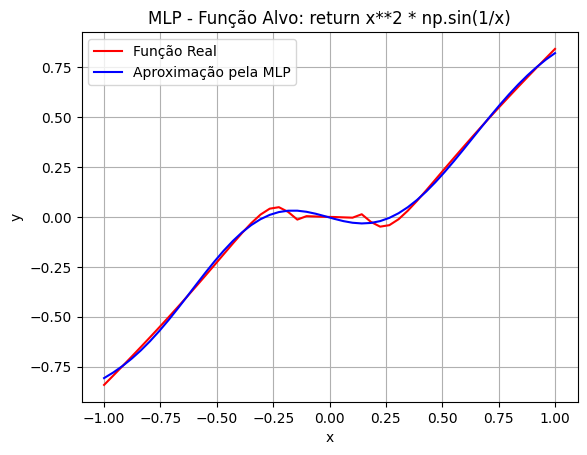

In [8]:
"""
Rafael de Oliveira Évora
MLP com AdaGrad
"""
import numpy as np
import matplotlib.pyplot as plt

# Função alvo para aproximação
def target_function(x):
    return x**2 * np.sin(1/x)

# Obtenção do texto da função alvo diretamente do código
import inspect
funcao_alvo_str = inspect.getsource(target_function).strip().split(":")[1].strip()

# Configurações da rede neural
entradas = 1                  # Número de entradas
camadas_ocultas = [100, 50]   # Número de neurônios em cada camada oculta
alfa = 0.005                  # Taxa de aprendizado
erro_tolerado = 0.0001        # Erro máximo permitido
ciclos_maximos = 1000         # Número máximo de ciclos
xmin, xmax = -1, 1            # Domínio da função
npontos = 50                  # Número de pontos de dados
epsilon = 1e-8                # Constante para evitar divisão por zero no AdaGrad

# Gera os dados de entrada e saída
x_orig = np.linspace(xmin, xmax, npontos).reshape(-1, 1)
t_orig = target_function(x_orig)

# Configurações da rede (pesos, biases e acumuladores do AdaGrad)
camadas = [entradas] + camadas_ocultas + [1]  # Arquitetura da rede
pesos = [np.random.uniform(-0.5, 0.5, (camadas[i], camadas[i + 1])) for i in range(len(camadas) - 1)]
biases = [np.random.uniform(-0.5, 0.5, (1, camadas[i + 1])) for i in range(len(camadas) - 1)]

# Acumuladores de gradientes para AdaGrad
pesos_acumulados = [np.zeros_like(w) for w in pesos]
biases_acumulados = [np.zeros_like(b) for b in biases]

# Treinamento da rede
erro_total = 1
ciclo = 0
while erro_total > erro_tolerado and ciclo < ciclos_maximos:
    erro_total = 0
    for padrao in range(x_orig.shape[0]):
        # Forward pass
        ativacoes = [x_orig[padrao, :].reshape(1, -1)]
        for w, b in zip(pesos, biases):
            ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
        y = ativacoes[-1]

        # Cálculo do erro
        erro = t_orig[padrao] - y
        erro_total += 0.5 * np.sum(erro**2)

        # Backpropagation
        grad = erro * (1 - y**2)  # Gradiente da saída
        for i in range(len(pesos) - 1, -1, -1):
            grad_w = np.dot(ativacoes[i].T, grad)
            grad_b = grad

            # Atualização dos acumuladores do AdaGrad
            pesos_acumulados[i] += grad_w**2
            biases_acumulados[i] += grad_b**2

            # Atualização dos pesos e biases com AdaGrad
            pesos[i] += (alfa * grad_w) / (np.sqrt(pesos_acumulados[i]) + epsilon)
            biases[i] += (alfa * grad_b) / (np.sqrt(biases_acumulados[i]) + epsilon)

            if i > 0:
                grad = np.dot(grad, pesos[i].T) * (1 - ativacoes[i]**2)

    ciclo += 1
    print(f"Ciclo: {ciclo} | Erro total: {erro_total:.4f}")  # Log do progresso

# Previsão final
y_final = np.zeros_like(t_orig)
for i in range(x_orig.shape[0]):
    ativacoes = [x_orig[i, :].reshape(1, -1)]
    for w, b in zip(pesos, biases):
        ativacoes.append(np.tanh(np.dot(ativacoes[-1], w) + b))
    y_final[i] = ativacoes[-1]

# Visualização dos resultados
plt.plot(x_orig, t_orig, color='red', label='Função Real')
plt.plot(x_orig, y_final, color='blue', label='Aproximação pela MLP')
plt.legend()
plt.title(f"MLP - Função Alvo: {funcao_alvo_str}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()